# Notebook to plot UNIT model training error, stored in csv files

## (mse vs ssim vs gan_err vs dis_err)

### TOC
 [1. Load data](#ld)<br>
 





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

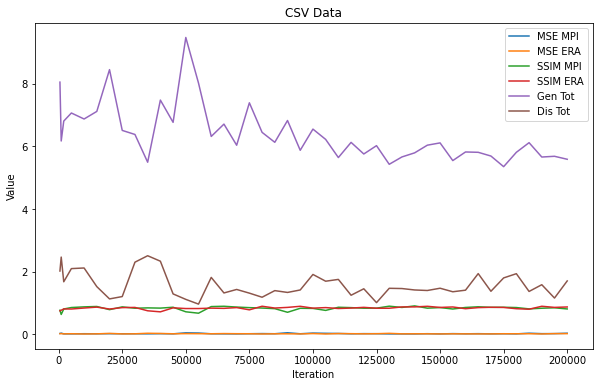

In [28]:
# Load CSV data into a Pandas DataFrame
filepath = '/glade/scratch/dkorytin/unit-wnet-wrferaext18-mean0-trainer-3resblks-3ds-bse-dropout-ssim/output/mse.csv'
df = pd.read_csv(filepath, header=None, skiprows=1, names=['iteration', 'mse_mpi', 'mse_era', 'ssim_mpi', 'ssim_era', 'gen_tot', 'dis_tot'])

# Extract columns
iteration = df['iteration']
mse_mpi = df['mse_mpi']
mse_era = df['mse_era']
ssim_mpi = df['ssim_mpi']
ssim_era = df['ssim_era']
gen_tot = df['gen_tot']
dis_tot = df['dis_tot']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(iteration, mse_mpi, label='MSE MPI')
plt.plot(iteration, mse_era, label='MSE ERA')
plt.plot(iteration, ssim_mpi, label='SSIM MPI')
plt.plot(iteration, ssim_era, label='SSIM ERA')
plt.plot(iteration, gen_tot, label='Gen Tot')
plt.plot(iteration, dis_tot, label='Dis Tot')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('CSV Data')
plt.legend()
plt.show()


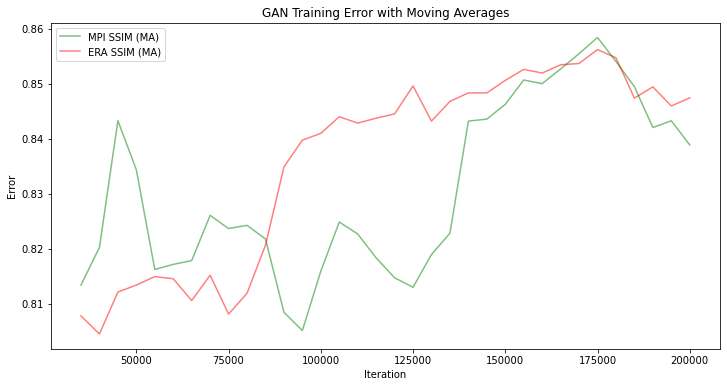

In [37]:
# Load CSV data into a Pandas DataFrame
filepath = '/glade/scratch/dkorytin/unit-wnet-wrferaext18-mean0-trainer-3resblks-3ds-bse-dropout-ssim/output/mse.csv'
df = pd.read_csv(filepath, header=None, skiprows=1, names=['iteration', 'mse_mpi', 'mse_era', 'ssim_mpi', 'ssim_era', 'gen_tot', 'dis_tot'])

# Extract columns
iteration = df['iteration']
mpi_mse = df['mse_mpi']
era_mse = df['mse_era']
mpi_ssim = df['ssim_mpi']
era_ssim = df['ssim_era']
total_gen_error = df['gen_tot']
discriminator_error = df['dis_tot']

# Calculate moving averages with window size of 10
window_size = 10
mse_mpi_ma = mpi_mse.rolling(window_size).mean()
era_mse_ma = era_mse.rolling(window_size).mean()
mpi_ssim_ma = mpi_ssim.rolling(window_size).mean()
era_ssim_ma = era_ssim.rolling(window_size).mean()
total_gen_error_ma = total_gen_error.rolling(window_size).mean()
discriminator_error_ma = discriminator_error.rolling(window_size).mean()

# Plot original data along with moving averages
plt.figure(figsize=(12, 6))
#plt.plot(df['iteration'], mse_mpi, label='MPI MSE')
#plt.plot(df['iteration'], mse_mpi_ma, label='MPI MSE (MA)', alpha=0.5, color='blue')
#plt.plot(df['iteration'], era_mse, label='ERA MSE')
#plt.plot(df['iteration'], era_mse_ma, label='ERA MSE (MA)', alpha=0.5, color='orange')
#plt.plot(df['iteration'], mpi_ssim, label='MPI SSIM')
plt.plot(df['iteration'], mpi_ssim_ma, label='MPI SSIM (MA)', alpha=0.5, color='green')
#plt.plot(df['iteration'], era_ssim, label='ERA SSIM')
plt.plot(df['iteration'], era_ssim_ma, label='ERA SSIM (MA)', alpha=0.5, color='red')
#plt.plot(df['iteration'], total_gen_error, label='Total Gen. Error')
#plt.plot(df['iteration'], total_gen_error_ma, label='Total Gen. Error (MA)', alpha=0.5, color='purple')
#plt.plot(df['iteration'], discriminator_error, label='Discriminator Error')
#plt.plot(df['iteration'], discriminator_error_ma, label='Discriminator Error (MA)', alpha=0.5, color='brown')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.title('GAN Training Error with Moving Averages')
plt.show()
